## Project: PCA and tSNE
 **Marks: 30**
-----------------------------

Welcome to the project on PCA and tSNE. In this project. We will be using the auto-mpg dataset.

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights. 

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Importing necessary libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [2]:
#load the data file
data = pd.read_csv("auto-mpg.csv")

In [3]:
 data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


**Observations:**

- There are 5 rows and 8 columns. 
- The column 'car name' is nonumeric and does not affect analysis. 
- Lots of cars from the 1970s. 

#### Check the info of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are 398 observations (excluding the 'target') and 8 columns in the data.
- All variables except 'hosepower' and 'car name' are numeric types. 
- The column 'horsepower' should be numeric.

## Data Preprocessing and Exploratory Data Analysis

In [5]:
#return number of unique elements in the object
unique_values = data.nunique()
print('Count of unique values in each column: \n', unique_values)


Count of unique values in each column: 
 mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
car name        305
dtype: int64


**Observations:**
- The column 'car name' is of object data type containing many unique entries and would not add values to our analysis. We can drop this column.

In [6]:
# dropping car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Checking values in horsepower column

In [7]:
# check the 'horsepower' column for nonnumeric data 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations ?, representing missing values. 
- Imput missing values in the column 'horsepower'.
- Change the data type in the column 'horsepower'.
- Replace missing data with np.nan, not a number. 

In [8]:
#replace missing values with np.nan
data['horsepower'] = data.replace(np.nan, 0)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,25.0,2046,19.0,71
126,21.0,6,200.0,21.0,2875,17.0,74
330,40.9,4,85.0,40.9,1835,17.3,80
336,23.6,4,140.0,23.6,2905,14.3,80
354,34.5,4,100.0,34.5,2320,15.8,81
374,23.0,4,151.0,23.0,3035,20.5,82


In [9]:
#inpute the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

#### Question 1: 
- **Check the summary statistics of the data (use describe function) (1 Mark)**
- **Write your observations (1 Mark)**

In [10]:
#summarize statistics of the data 
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,23.514573,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,7.815984,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,9.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,17.500000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,23.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,29.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,46.600000,5140.000000,24.800000,82.000000


**Observations:**
- The measure of central tendency is average. No outliers appear at first glance. 
- Data mpg represents the variation(s) in drivers' speed.
- There is also variation in the each drivers' vehicular: horsepower, weight, acceleration and model year. Cars are all different. 
- Data for 'cylinders' is left-skewed in distribution.
- Maximum engine size (displacement) seems high for some vehicles. 
- Maximum weight also seems quite high for some vehicles. 

#### Let's check the distribution and outliers for each column in the data

#### Question 2:
- **Create the histogram to check distribution of all variables (use .hist() attribute) (1 Mark)**
- **Create boxplot to visualize outliers for all variables (use sns.boxplot()) (1 Mark)**
- **Write your observations (2 Marks)**

mpg
Skew : 0.46


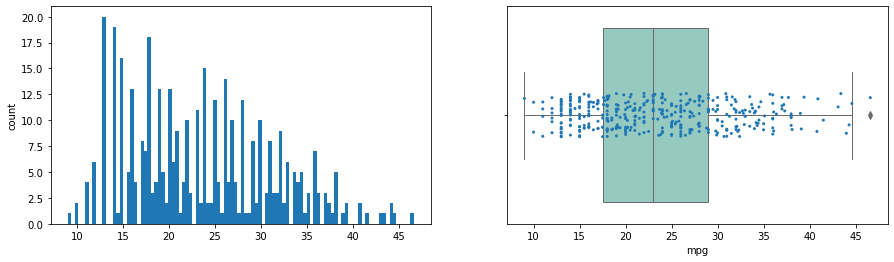

cylinders
Skew : 0.53


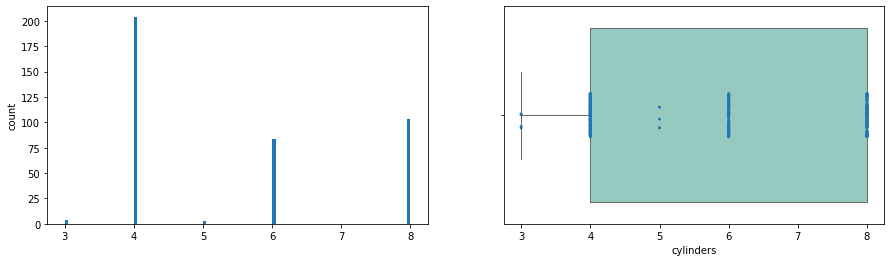

displacement
Skew : 0.72


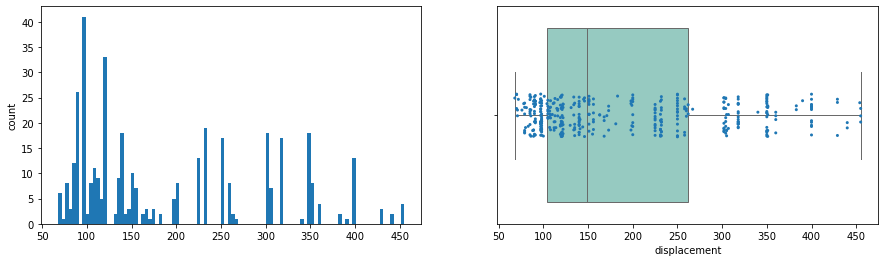

horsepower
Skew : 0.46


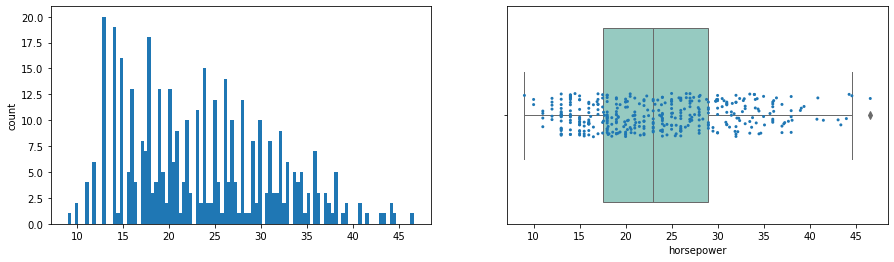

weight
Skew : 0.53


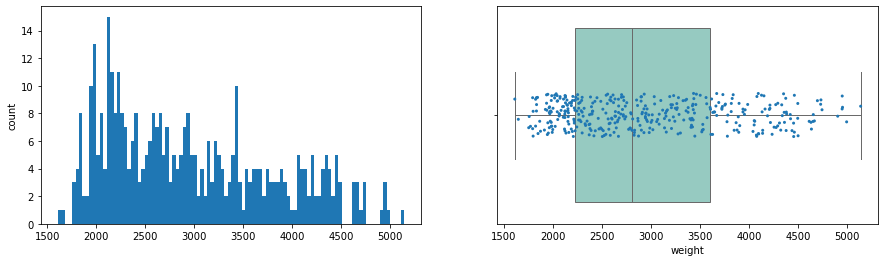

acceleration
Skew : 0.28


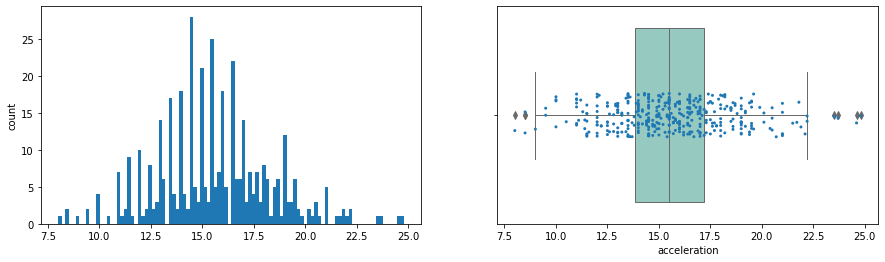

model year
Skew : 0.01


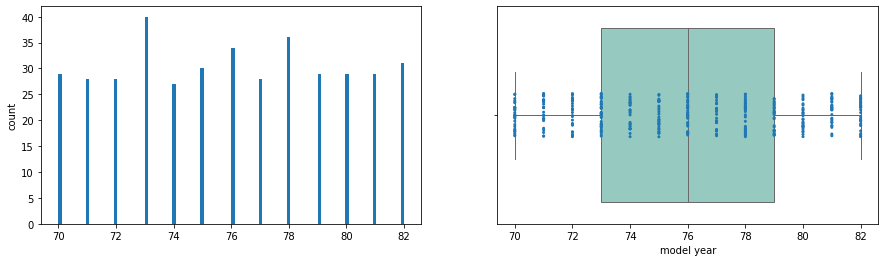

In [11]:
# check distribution of all variables

for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=100, grid=False)
    plt.ylabel("count", fontsize=10)
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col], data=data, palette='Set3', linewidth=1.0)
    sns.stripplot(x=data[col], size=3)
    plt.show()

**Observations:**
- The imputed_horsepower has a higher number of datapoints with low values, (i.e. cars with less horsepower).
- In training a model, the imputed_horsepower will perform better at predicting any given data at the lower horsepower rather than over the higher horsepower.
- For mpg Q2-Q1 and Q3-Q2 appear equal, but are positively skewed since the right whisker is greater than the left wisker.
- Acceleration has the most univariate outliers, which might suggest there are anomalies in driving behavior.
- The strip plots indicate that 'cylinders' and 'model year' are not helpful in detection of gaps and outliers. 
- The displacement (engine size), has a higher number of data points with low values (i.e. cars with a smaller engine). 
- In training a model, the displacement will perform better at predicting given data at the lower displacement rather than over the higher displacement. 
- Outliers exist for horsepower, acceleration and mpg. 
- We don't expect 'model year' to have any skew. 

#### Checking correlation

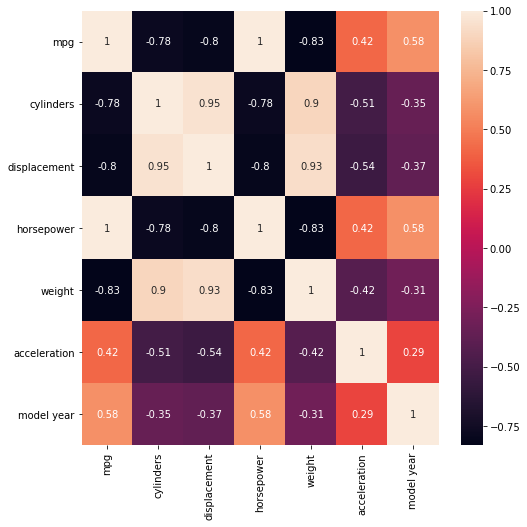

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- It is immediately easy to assume that the the cylinders, engine size, horse power and weight significantly affect mpg. However, 
- the variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- This possibly implies that the dataset is analyzing a different aspect of vehicular behavior 
- (i.e. drivers' behavior in their vehicle, versus the vehicles' behavior due to certain mechanical factors). 
- The more horsepower a vehicle has, does not imply that the car accelerates more over other vehicles. 
- In this dataset, heavier vehicles represent vehicles with possibly more horsepower, bigger engine size and more cylinder.
- The newer the vehicle, it is assumed the faster the vehicle can travel in mpg.

#### Scaling the data

In [13]:
#scale the data

data['target'] = np.nan
print(data.head())
print(data.info())

variables = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model year']

x = data.loc[:,variables].values
y = data.loc[:,['target']].values

x = StandardScaler().fit_transform(x)
data_scaled = pd.DataFrame(x)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0        18.0    3504          12.0   
1  15.0          8         350.0        15.0    3693          11.5   
2  18.0          8         318.0        18.0    3436          11.0   
3  16.0          8         304.0        16.0    3433          12.0   
4  17.0          8         302.0        17.0    3449          10.5   

   model year  target  
0          70     NaN  
1          70     NaN  
2          70     NaN  
3          70     NaN  
4          70     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-nul

## Principal Component Analysis

#### Question 3:

- **Apply the PCA algorithm with number of components equal to the total number of columns in the data with random_state=1 (2 Marks)**
- **Write observations on the variance explained by components (2 Marks)**

In [33]:
#define the number of principal components to generate 
n=data_scaled.shape[1]
print(n)
pca = PCA(random_state=1)
data_pca1 = pca.fit_transform(x)
data_pca1 = pd.DataFrame(data_pca1)
data_pca1.head()

#set percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_
exp_var
print(exp_var[:3].sum())

7
0.9445612979333134


In [15]:
data_pca1['target']=y
data_pca1.columns = ['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'target']
data_pca1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,target
0,-2.670739,0.583820,-0.945791,0.821932,0.306385,-0.138838,2.653309e-15,NaN
1,-3.307471,0.537434,-0.913172,0.567524,0.214663,0.120005,-1.111045e-17,NaN
2,-2.776395,0.521428,-1.296837,0.774552,0.334269,-0.048636,-7.748114e-17,NaN
3,-2.839173,0.709600,-0.872648,0.560302,0.447783,-0.104517,-3.017053e-17,NaN
4,-2.872554,0.575939,-1.418786,0.564157,0.363464,-0.180589,-6.531853e-17,NaN


Text(0, 0.5, 'Cumulative Explained Variance')

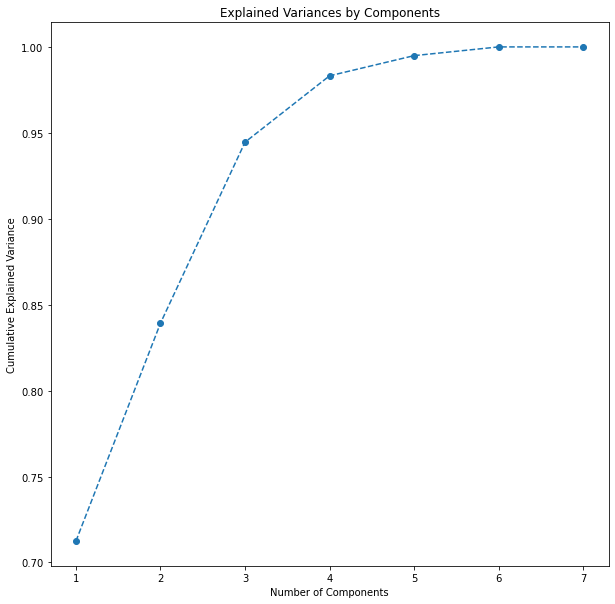

In [16]:
# data includes the new column imputed_horsepower
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [17]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**OBSERVATIONS:**
- The first principal component accounts for 71.24%  variance, the second and third and fourth account for : 12.68%, 10.53%, .3861%. 
- 71.24% + 12.68%, 10.53% = 94.46% is captured by the first and second principal components.
- Take the first three, largest components. Ignore small components as they are not significant. 
- There are 3 Principal Components that explain at least 90% of variance. 

In [18]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
0,0.42,-0.19,-0.18
1,-0.41,-0.27,0.06
2,-0.42,-0.25,0.03
3,0.42,-0.19,-0.18
4,-0.41,-0.26,0.23
5,0.26,0.16,0.92
6,0.25,-0.84,0.16


#### Question 4: **Interpret the coefficients of three principal components from the below dataframe (6 Marks)**

In [19]:
def color_high(val):
    if abs(val) >= 0.80: # positive or negative accepted
        return 'background: green'
    elif abs(val) >= 0.20:
        return 'background: blue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
0,0.420000,-0.190000,-0.180000
1,-0.410000,-0.270000,0.060000
2,-0.420000,-0.250000,0.030000
3,0.420000,-0.190000,-0.180000
4,-0.410000,-0.260000,0.230000
5,0.260000,0.160000,0.920000
6,0.250000,-0.840000,0.160000


**Observations:**
- PCA3 captures 92% of the data in reference to 'acceleration'. 
- 'Acceleration' has a strong, positive effect on the principal component.
- 'Model year' strongly and negatively effects the principal component.
- For PCA1 the coefficients are higher or equal to 0.20. 
- For PCA2 and PCA3 the coefficients become smaller. 
- PCA1 'horsepower' and 'mpg' are the same and have a strong, positive effect on the principal component. 

#### We can also visualize the data in 2 dimensions using first two principal components 

/Users/student/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,target
0,-2.670739,0.583820,-0.945791,0.821932,0.306385,-0.138838,2.653309e-15,NaN
1,-3.307471,0.537434,-0.913172,0.567524,0.214663,0.120005,-1.111045e-17,NaN
2,-2.776395,0.521428,-1.296837,0.774552,0.334269,-0.048636,-7.748114e-17,NaN
3,-2.839173,0.709600,-0.872648,0.560302,0.447783,-0.104517,-3.017053e-17,NaN
4,-2.872554,0.575939,-1.418786,0.564157,0.363464,-0.180589,-6.531853e-17,NaN


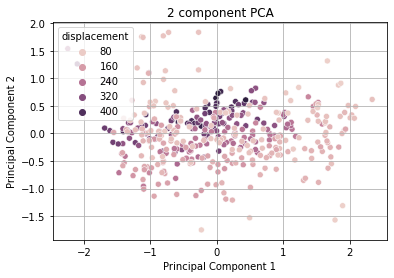

In [20]:
df_concat = pd.concat([data_pca1, data], axis=1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title('2 component PCA')
targets = ['PC1', 'PC2', 'PC3']
colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
    # indicesToKeep = data_pca1['target'] == target
sns.scatterplot(df_concat.iloc[:,1], df_concat.iloc[:,3], hue=df_concat.displacement)
ax.grid()

data_pca1.head()

**Let's try adding hue to the scatter plot**

#### Question 5: 

- **Create a scatter plot for first two principal components with hue = 'cylinders' (2 Marks)** 
- **Write your observations on the plot (2 Marks)**

        PC1       PC2       PC3       PC4       PC5       PC6           PC7  \
0 -2.670739  0.583820 -0.945791  0.821932  0.306385 -0.138838  2.653309e-15   
1 -3.307471  0.537434 -0.913172  0.567524  0.214663  0.120005 -1.111045e-17   
2 -2.776395  0.521428 -1.296837  0.774552  0.334269 -0.048636 -7.748114e-17   
3 -2.839173  0.709600 -0.872648  0.560302  0.447783 -0.104517 -3.017053e-17   
4 -2.872554  0.575939 -1.418786  0.564157  0.363464 -0.180589 -6.531853e-17   

   target   mpg  cylinders  displacement  horsepower  weight  acceleration  \
0     NaN  18.0          8         307.0        18.0    3504          12.0   
1     NaN  15.0          8         350.0        15.0    3693          11.5   
2     NaN  18.0          8         318.0        18.0    3436          11.0   
3     NaN  16.0          8         304.0        16.0    3433          12.0   
4     NaN  17.0          8         302.0        17.0    3449          10.5   

   model year  target  
0          70     NaN  
1       

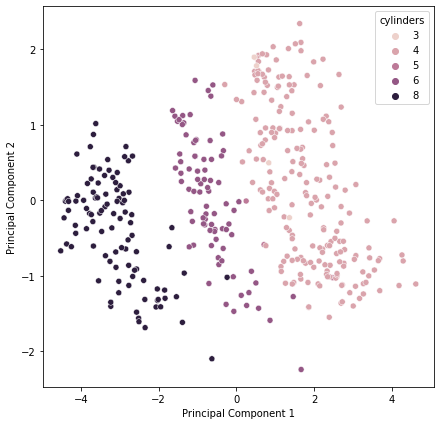

In [21]:
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))
#Create a scatter plot with x=0 and y=1 using df_concat dataframe
sns.scatterplot(x=df_concat.iloc[:,0],y=df_concat.iloc[:,1],hue=data.cylinders)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
print(df_concat.head())
print(df_concat.iloc[:,1])

**Observations:**
- As we compare PCA1 to PCA2, there doesn't appear a strong correlation. 
- However, there are distinct groups related to the PCA. 

## t-SNE

#### Question 6: 
- **Apply the TSNE embedding with 2 components for the dataframe data_scaled (use random_state=1) (2 Marks)**
- **Write your observations on the below scatter plots (2 Marks)**   

In [22]:
tsne = TSNE(random_state=1)  #Apply the TSNE algorithm with random state = 1
data_tsne = tsne.fit_transform(data_scaled) #Fit and transform tsne function on the scaled data

In [23]:
data_tsne.shape

(398, 2)

In [24]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [25]:
data_tsne.head()

,Component 1,Component 2
0,-8.521472,-32.288166
1,-9.752097,-33.169827
2,-8.624784,-32.887333
3,-9.001032,-32.356297
4,-8.799390,-33.139214


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

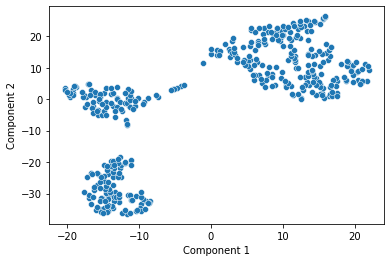

In [26]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

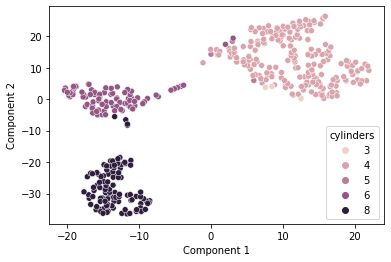

In [27]:
# Let's see scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data.cylinders)

**Observations:**
- There are almost perfectly distinct components 
- comprised of 8 cylinders, 6 cylinders and 3-5 cylinders.
- THe 8 and 6 cylinders are similar across component 1, but 
- different from components 3 and 5. 
- All three groups are different across both components, even though there is overlap.  

In [28]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [29]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

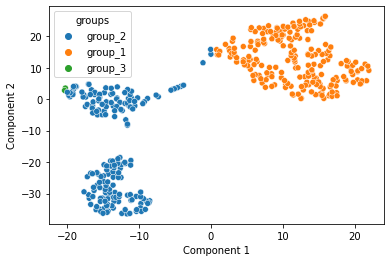

In [30]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [31]:
data['groups'] = data_tsne['groups'] 
data['groups']

0      group_2
1      group_2
2      group_2
3      group_2
4      group_2
        ...   
393    group_1
394    group_1
395    group_1
396    group_1
397    group_1
Name: groups, Length: 398, dtype: object

#### Question 7: 
- **Complete the following code by filling the blanks (2 Marks)**
- **Write your observations on different groups w.r.t different variables (4 Marks)**

In [73]:
print(data.columns)
print(data_scaled.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'target', 'groups'],
      dtype='object')
RangeIndex(start=0, stop=7, step=1)


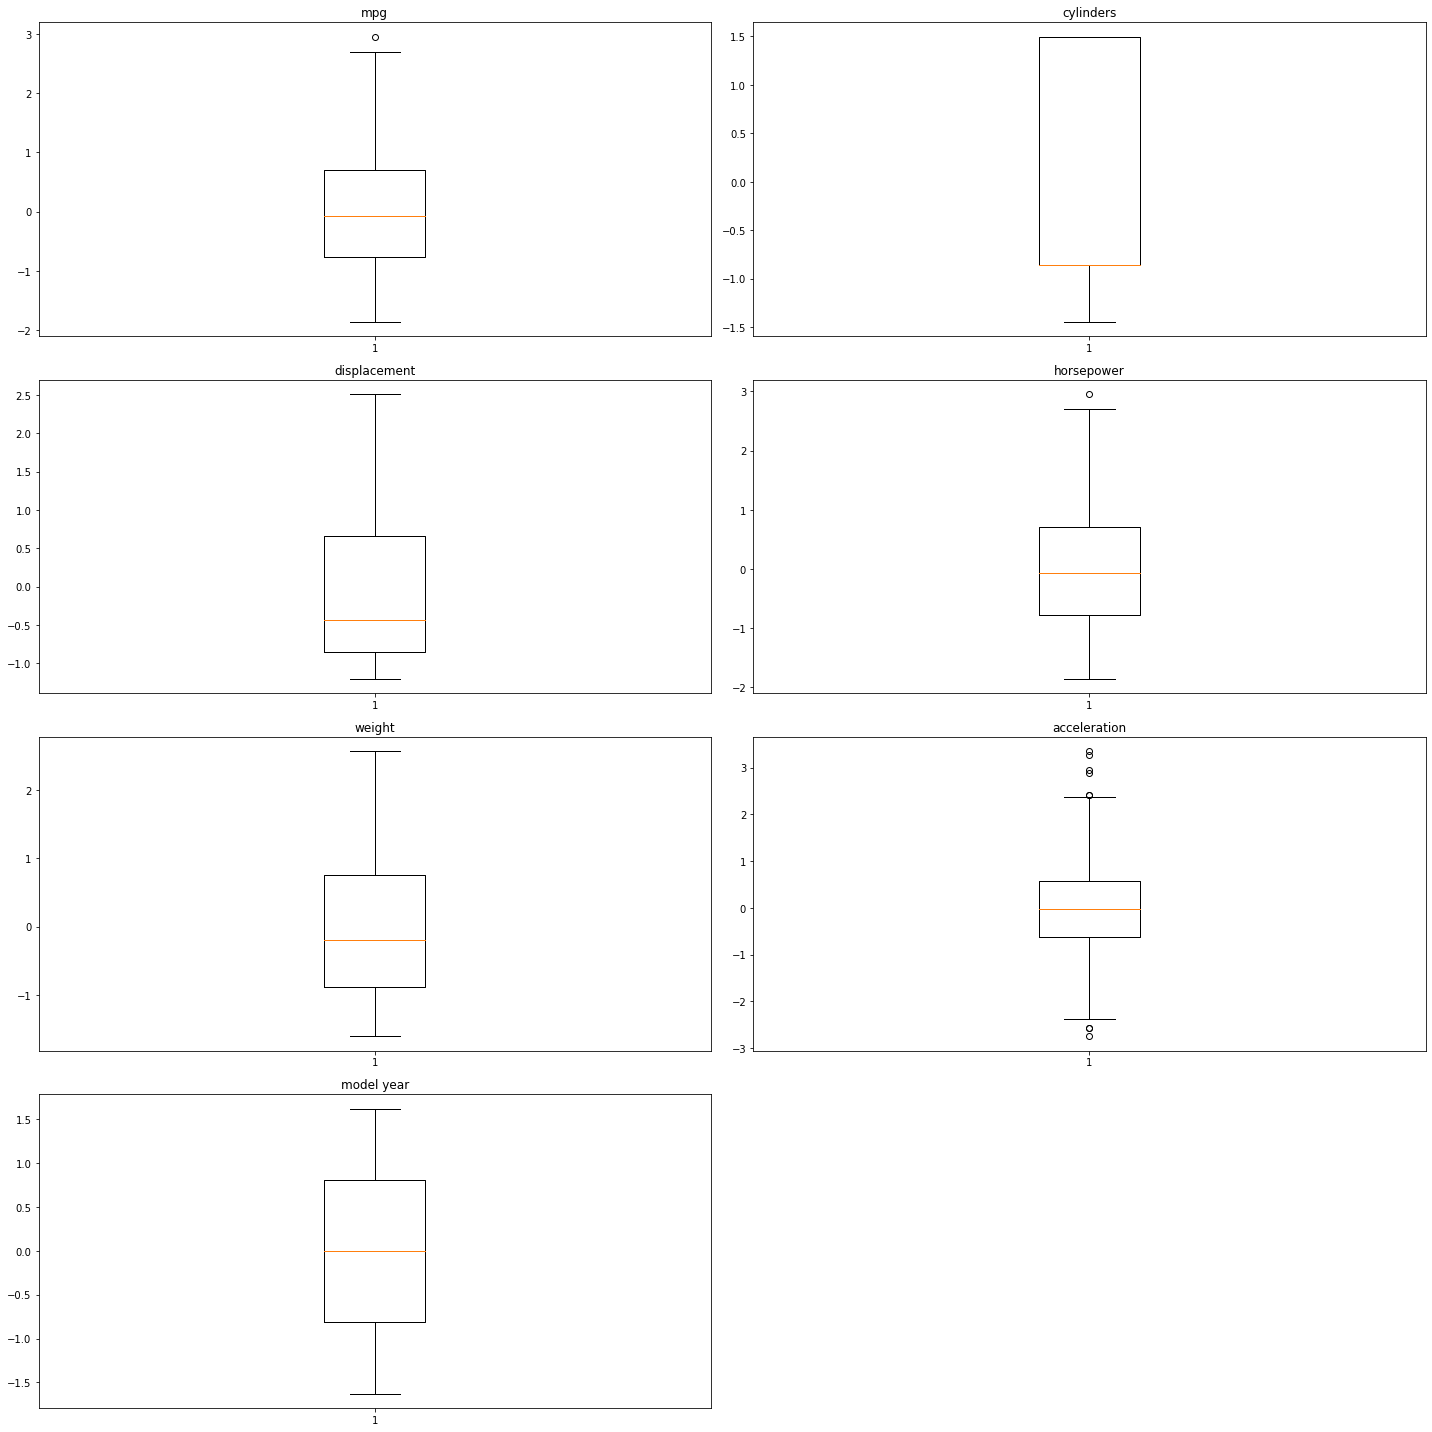

In [77]:
all_col = data.columns.tolist()[:7]
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis and variable on the y-axis (use the dataframe data)
    plt.boxplot(data_scaled[i])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**
- All datasets are very different. 
- Odd shape for cylinder column. 
- Outliers on some of the datasets, particularly 'acceleration.'